# Assignment 1 - Machine Learning (INFO 7390) Review

## Introduction

For this assignment, I have selected Kaggle ML and Data Science Survey of 2017 dataset. 

The dataset can be found in the below link [Kaggle ML and Data Science Survey, 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

### Background

Kaggle conducted an industry-wide survey to establish a comprehensive view of the state of data science and machine learning. The survey received over 16,000 responses and they learned a ton about who is working with data, what’s happening at the cutting edge of machine learning across industries, and how new data scientists can best break into the field.

## Part A - Get Some Data 

To analyse the data, first we will import the dataset to the notebook

In [457]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import sklearn

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

response=pd.read_csv('./kaggle_ds_survey.csv',encoding='ISO-8859-1', low_memory=False)
response.head()

GenderSelect        Country   Age  \
0  Non-binary, genderqueer, or gender non-conforming            NaN   NaN   
1                                             Female  United States  30.0   
2                                               Male         Canada  28.0   
3                                               Male  United States  56.0   
4                                               Male         Taiwan  38.0   

                                    EmploymentStatus StudentStatus  \
0                                 Employed full-time           NaN   
1                 Not employed, but looking for work           NaN   
2                 Not employed, but looking for work           NaN   
3  Independent contractor, freelancer, or self-em...           NaN   
4                                 Employed full-time           NaN   

  LearningDataScience CodeWriter CareerSwitcher  \
0                 NaN        Yes            NaN   
1                 NaN        NaN            NaN   
2                 NaN        NaN            NaN   
3                 NaN        Yes            NaN   
4                 NaN        Yes            NaN   

              CurrentJobTitleSelect TitleFit              ...                \
0             DBA/Database Engineer     Fine              ...                 
1                               NaN      NaN              ...                 
2                               NaN      NaN              ...                 
3  Operations Research Practitioner   Poorly              ...                 
4                Computer Scientist     Fine              ...                 

  JobFactorExperienceLevel JobFactorDepartment  JobFactorTitle  \
0                      NaN                 NaN             NaN   
1                      NaN                 NaN             NaN   
2           Very Important      Very Important  Very Important   
3                      NaN                 NaN             NaN   
4                      NaN                 NaN             NaN   

  JobFactorCompanyFunding JobFactorImpact JobFactorRemote JobFactorIndustry  \
0                     NaN             NaN             NaN               NaN   
1                     NaN             NaN             NaN               NaN   
2          Very Important  Very Important  Very Important    Very Important   
3                     NaN             NaN             NaN               NaN   
4                     NaN             NaN             NaN               NaN   

  JobFactorLeaderReputation JobFactorDiversity JobFactorPublishingOpportunity  
0                       NaN                NaN                            NaN  
1        Somewhat important                NaN                            NaN  
2            Very Important     Very Important                 Very Important  
3                       NaN                NaN                            NaN  
4                       NaN                NaN                            NaN  

[5 rows x 228 columns]

In [458]:
response.describe()

Age  LearningCategorySelftTaught  \
count  16385.000000                 13109.000000   
mean      32.372841                    33.366771   
std       10.473487                    25.787181   
min        0.000000                     0.000000   
25%       25.000000                    15.000000   
50%       30.000000                    30.000000   
75%       37.000000                    50.000000   
max      100.000000                   100.000000   

       LearningCategoryOnlineCourses  LearningCategoryWork  \
count                   13126.000000          13111.000000   
mean                       27.375514             15.217593   
std                        26.860840             18.996778   
min                         0.000000              0.000000   
25%                         5.000000              0.000000   
50%                        20.000000             10.000000   
75%                        40.000000             25.000000   
max                       100.000000            100.000000   

       LearningCategoryUniversity  LearningCategoryKaggle  \
count                13122.000000            13126.000000   
mean                    16.988607                5.531434   
std                     23.676917               11.072680   
min                      0.000000                0.000000   
25%                      0.000000                0.000000   
50%                      5.000000                0.000000   
75%                     30.000000               10.000000   
max                    100.000000              100.000000   

       LearningCategoryOther  TimeGatheringData  TimeModelBuilding  \
count           13094.000000        7530.000000        7528.000000   
mean                1.795940          36.144754          21.268066   
std                 9.357886          21.649591          16.165958   
min                 0.000000           0.000000           0.000000   
25%                 0.000000          20.000000          10.000000   
50%                 0.000000          35.000000          20.000000   
75%                 0.000000          50.000000          30.000000   
max               100.000000         100.000000         100.000000   

       TimeProduction  TimeVisualizing  TimeFindingInsights  TimeOtherSelect  
count     7517.000000      7529.000000          7523.000000      7513.000000  
mean        10.806372        13.869372            13.094776         2.396247  
std         12.257932        11.722945            12.974846        12.157137  
min          0.000000         0.000000             0.000000         0.000000  
25%          0.000000         5.000000             5.000000         0.000000  
50%         10.000000        10.000000            10.000000         0.000000  
75%         15.000000        20.000000            20.000000         0.000000  
max        100.000000       100.000000           303.000000       100.000000

In [459]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [460]:
print('The total number of respondents:',response.shape[0])
print('Total number of Countries with respondents:',response['Country'].nunique())
print('Country with highest respondents:',response['Country'].value_counts().index[0],'with',response['Country'].value_counts().values[0],'respondents')
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


### Data cleaning

1. Are there missing values? (10 %)
    
2. Are there inappropraite values? (10 %)
3. Remove or impute any bad data. (10 %)
4. Answer the following questions for the data in each column:

5. How is the data distributed? (10 %)
6. What are the summary statistics? (10 %)
7. Are there anomalies/outliers? (10 %)
8. Plot each colmun as appropriate for the data type:

9. Write a summary of what the plot tells you. (10 %)
10. Are any of the columns correlated? (10 %)

11. Write a clear summary of what the EDA tells you (20 %)

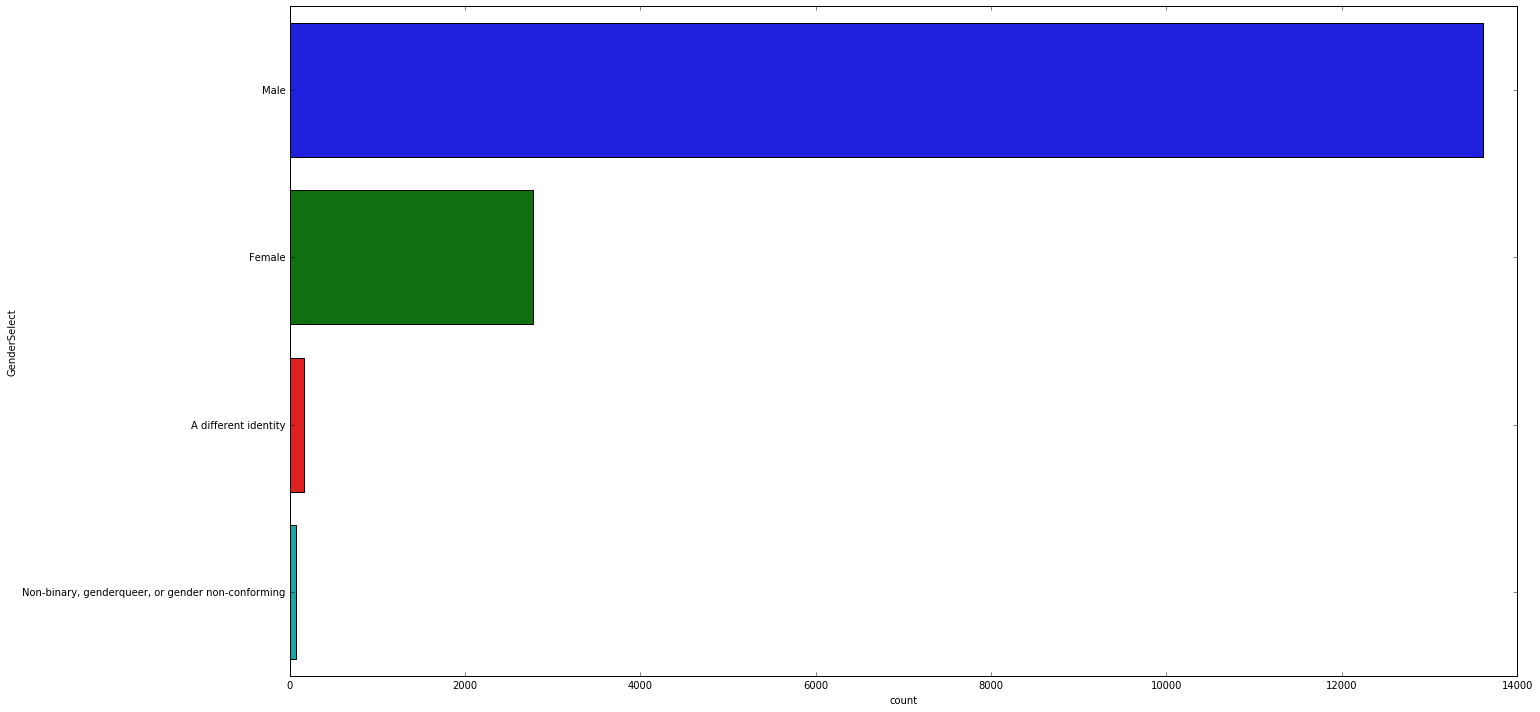

In [461]:
plt.subplots(figsize=(22,12))
sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
plt.show()

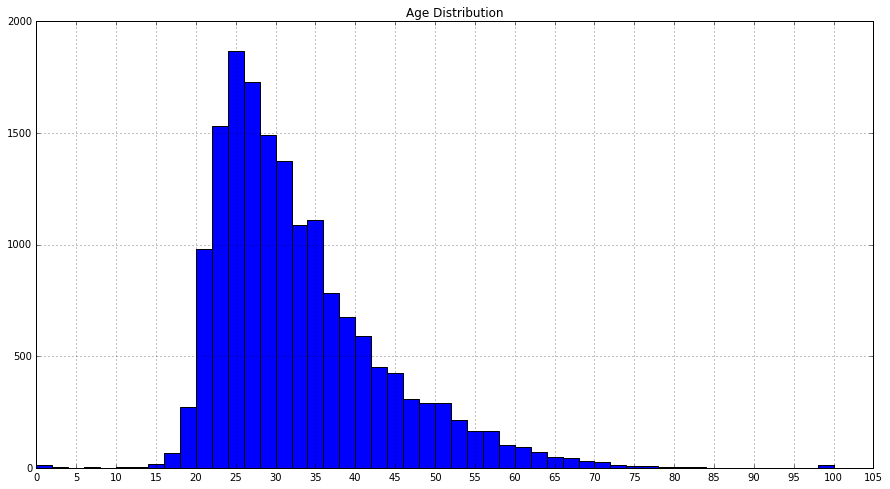

In [462]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50)
plt.xticks(list(range(0,110,5)))
plt.title('Age Distribution')
plt.show() 

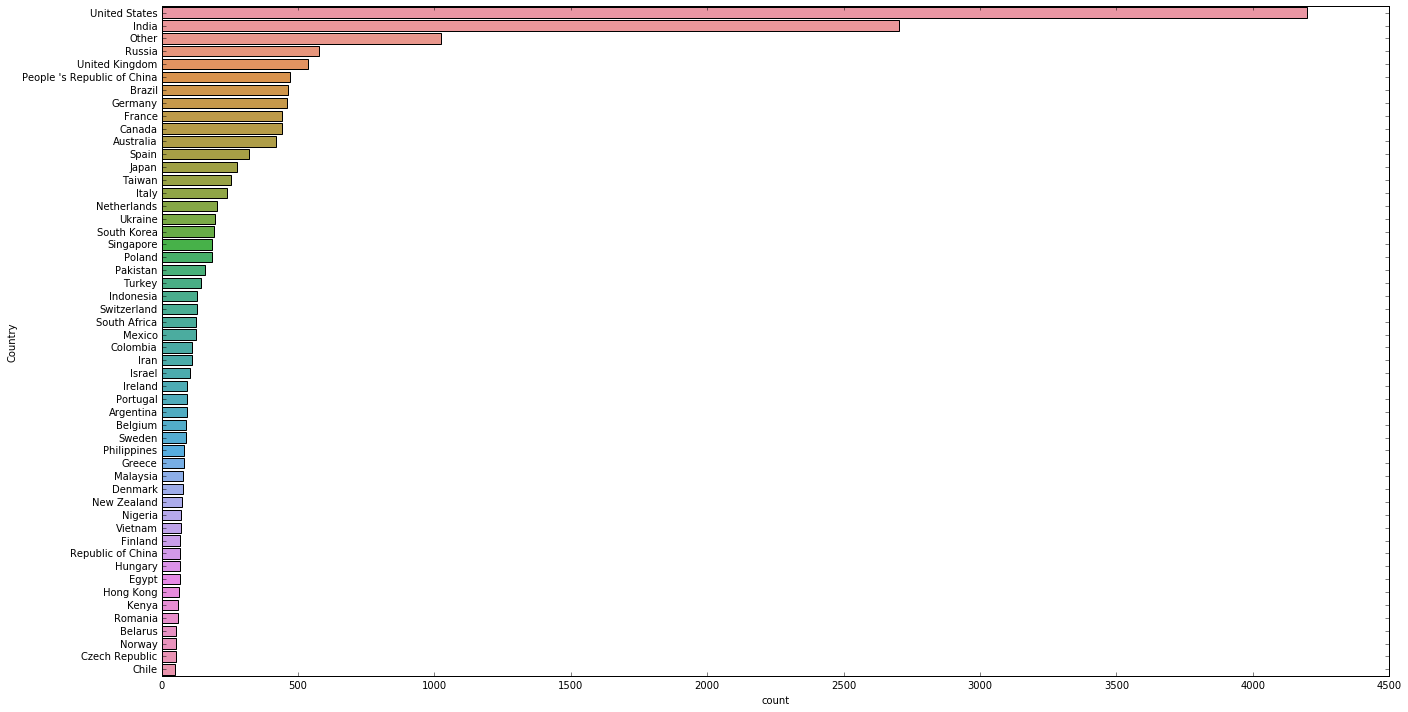

In [463]:
plt.subplots(figsize=(22,12))
sns.countplot(y=response['Country'],order=response['Country'].value_counts().index)
plt.show()

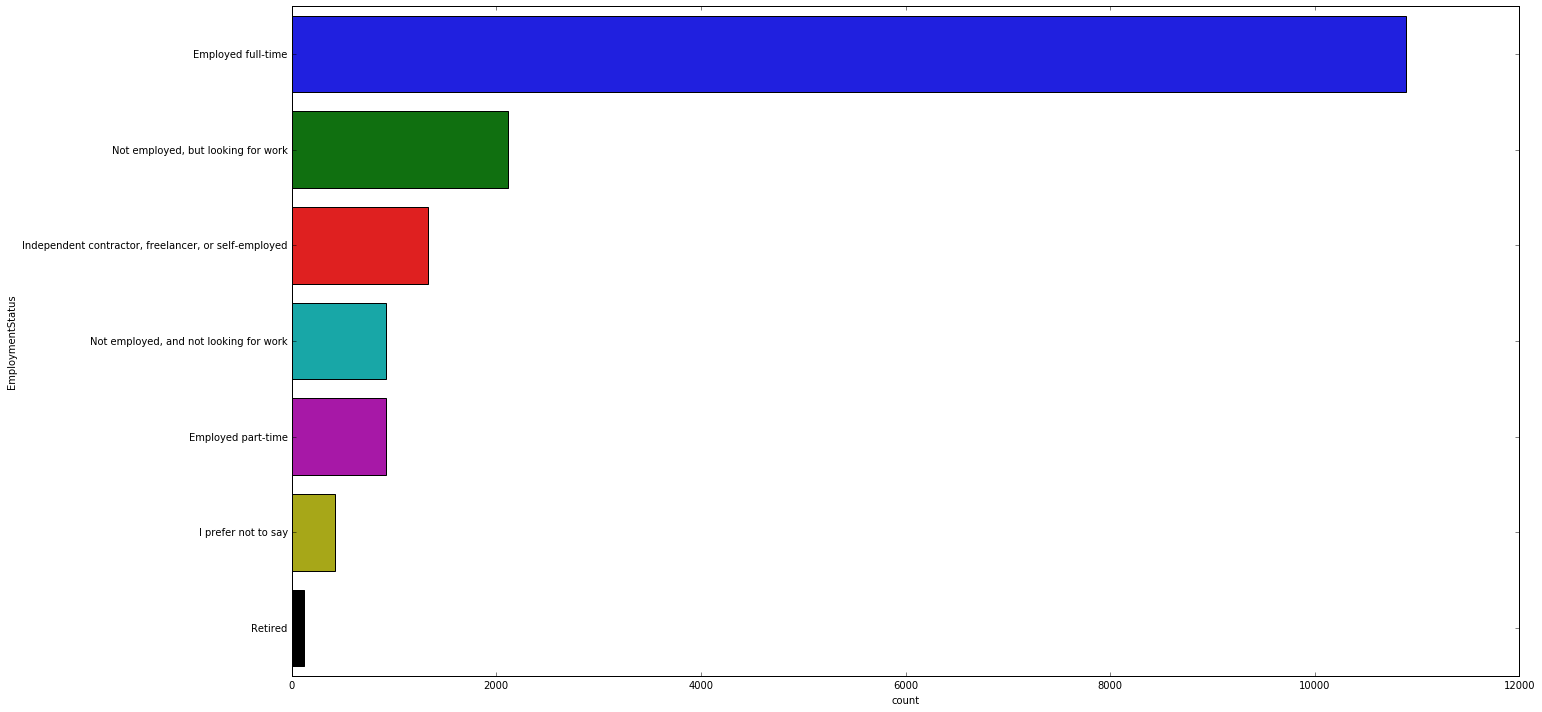

In [464]:
plt.subplots(figsize=(22,12))
sns.countplot(y=response['EmploymentStatus'],order=response['EmploymentStatus'].value_counts().index)
plt.show()

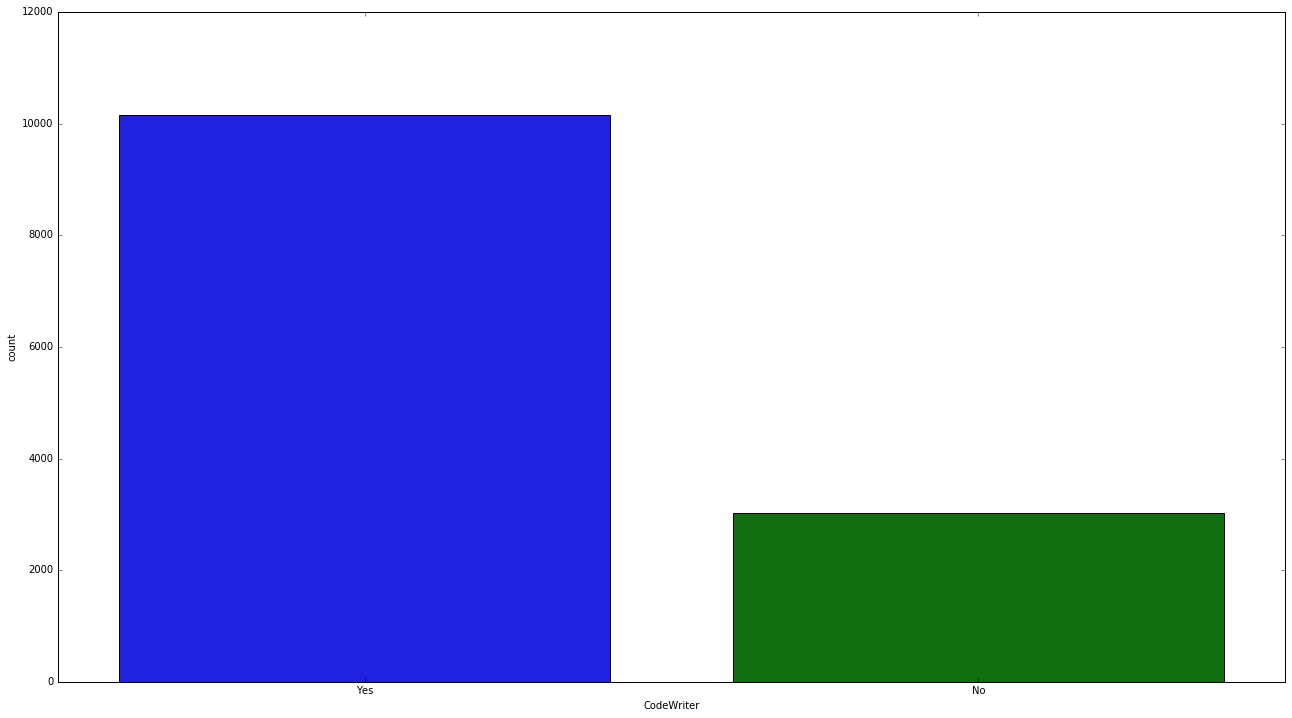

In [465]:
plt.subplots(figsize=(22,12))
sns.countplot(x=response['CodeWriter'],order=response['CodeWriter'].value_counts().index)
plt.show()

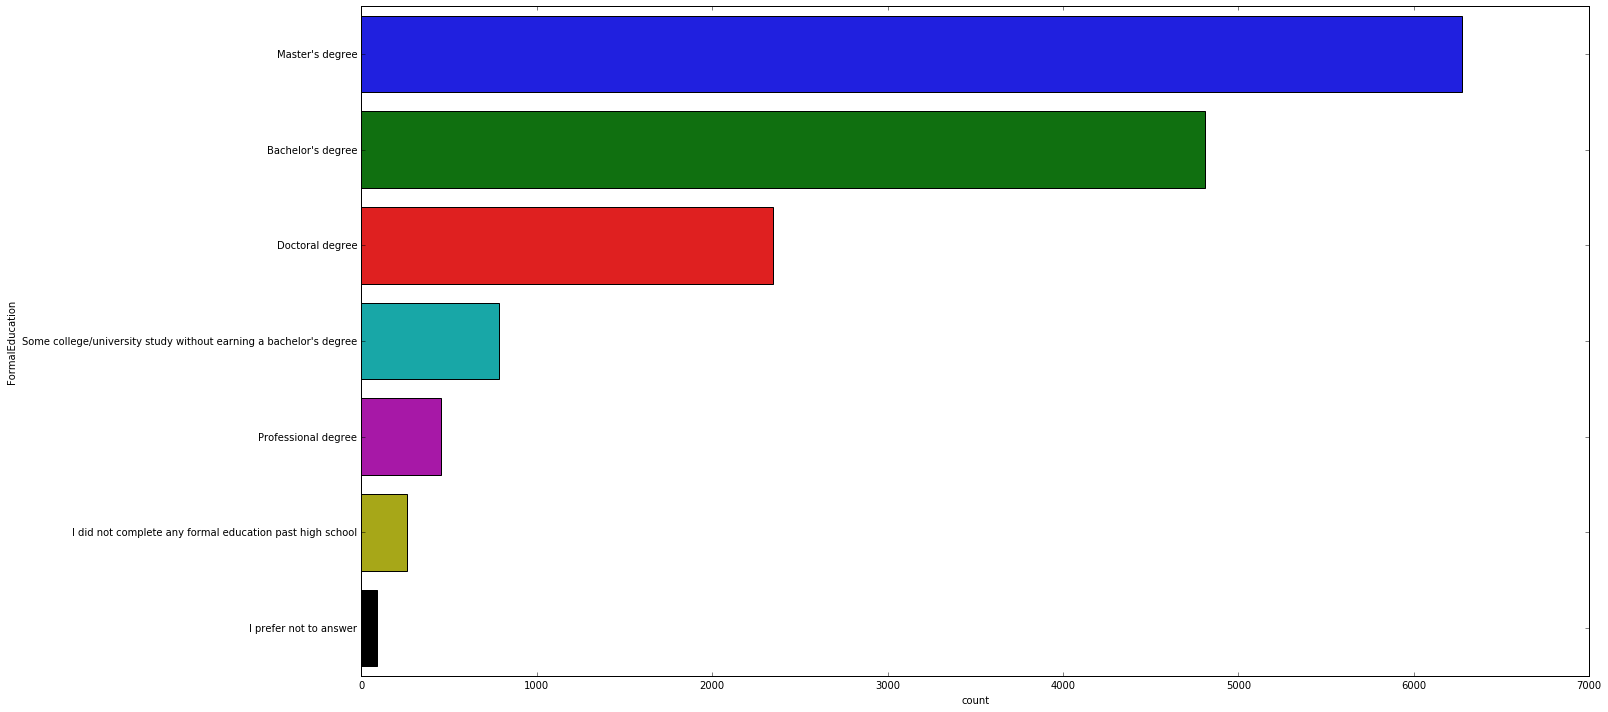

In [466]:
plt.subplots(figsize=(22,12))
sns.countplot(y=response['FormalEducation'],order=response['FormalEducation'].value_counts().index)
plt.show()

In [467]:
response = response[['GenderSelect','Country','Age','EmploymentStatus','CodeWriter','CurrentJobTitleSelect','MLToolNextYearSelect','MLMethodNextYearSelect','LanguageRecommendationSelect','FormalEducation','MajorSelect','Tenure','FirstTrainingSelect','LearningCategorySelftTaught','LearningCategoryOnlineCourses','LearningCategoryWork','LearningCategoryUniversity','LearningCategoryKaggle','LearningCategoryOther']]
response.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 19 columns):
GenderSelect                     16621 non-null object
Country                          16595 non-null object
Age                              16385 non-null float64
EmploymentStatus                 16716 non-null object
CodeWriter                       13186 non-null object
CurrentJobTitleSelect            11830 non-null object
MLToolNextYearSelect             10998 non-null object
MLMethodNextYearSelect           10833 non-null object
LanguageRecommendationSelect     10998 non-null object
FormalEducation                  15015 non-null object
MajorSelect                      13281 non-null object
Tenure                           13532 non-null object
FirstTrainingSelect              14712 non-null object
LearningCategorySelftTaught      13109 non-null float64
LearningCategoryOnlineCourses    13126 non-null float64
LearningCategoryWork             13111 non-null float64
Learnin

In [468]:
response.isnull().sum()

GenderSelect                       95
Country                           121
Age                               331
EmploymentStatus                    0
CodeWriter                       3530
CurrentJobTitleSelect            4886
MLToolNextYearSelect             5718
MLMethodNextYearSelect           5883
LanguageRecommendationSelect     5718
FormalEducation                  1701
MajorSelect                      3435
Tenure                           3184
FirstTrainingSelect              2004
LearningCategorySelftTaught      3607
LearningCategoryOnlineCourses    3590
LearningCategoryWork             3605
LearningCategoryUniversity       3594
LearningCategoryKaggle           3590
LearningCategoryOther            3622
dtype: int64

In [469]:
response = response.dropna(subset=['Tenure'])
response.isnull().sum()

GenderSelect                       47
Country                            53
Age                               201
EmploymentStatus                    0
CodeWriter                       2000
CurrentJobTitleSelect            2007
MLToolNextYearSelect             3599
MLMethodNextYearSelect           3733
LanguageRecommendationSelect     3589
FormalEducation                    29
MajorSelect                      1304
Tenure                              0
FirstTrainingSelect                39
LearningCategorySelftTaught       483
LearningCategoryOnlineCourses     466
LearningCategoryWork              481
LearningCategoryUniversity        470
LearningCategoryKaggle            466
LearningCategoryOther             498
dtype: int64

In [470]:
response = response.dropna()
response.isnull().sum()

GenderSelect                     0
Country                          0
Age                              0
EmploymentStatus                 0
CodeWriter                       0
CurrentJobTitleSelect            0
MLToolNextYearSelect             0
MLMethodNextYearSelect           0
LanguageRecommendationSelect     0
FormalEducation                  0
MajorSelect                      0
Tenure                           0
FirstTrainingSelect              0
LearningCategorySelftTaught      0
LearningCategoryOnlineCourses    0
LearningCategoryWork             0
LearningCategoryUniversity       0
LearningCategoryKaggle           0
LearningCategoryOther            0
dtype: int64

In [471]:
response.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 3 to 16712
Data columns (total 19 columns):
GenderSelect                     6894 non-null object
Country                          6894 non-null object
Age                              6894 non-null float64
EmploymentStatus                 6894 non-null object
CodeWriter                       6894 non-null object
CurrentJobTitleSelect            6894 non-null object
MLToolNextYearSelect             6894 non-null object
MLMethodNextYearSelect           6894 non-null object
LanguageRecommendationSelect     6894 non-null object
FormalEducation                  6894 non-null object
MajorSelect                      6894 non-null object
Tenure                           6894 non-null object
FirstTrainingSelect              6894 non-null object
LearningCategorySelftTaught      6894 non-null float64
LearningCategoryOnlineCourses    6894 non-null float64
LearningCategoryWork             6894 non-null float64
LearningCategoryUniversi

In [472]:
response = response.loc[(response['Age'] >15) & (response['Age']<85)]

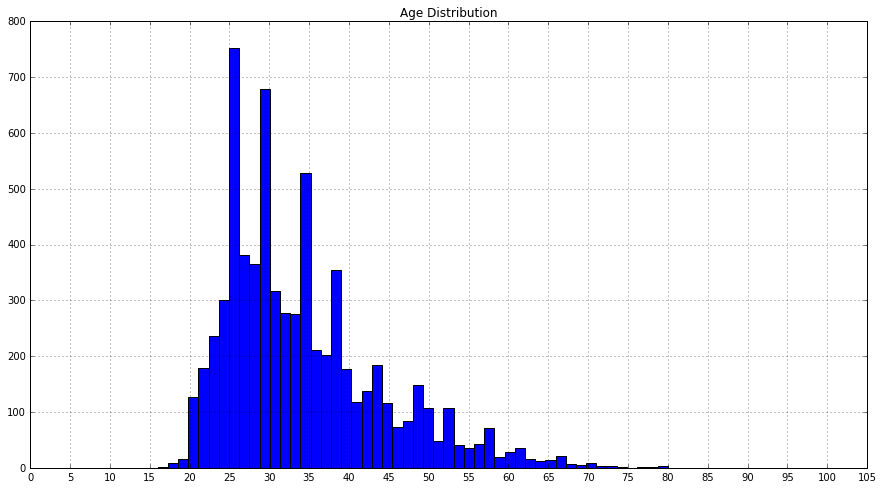

In [473]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50)
plt.xticks(list(range(0,110,5)))
plt.title('Age Distribution')
plt.show() 


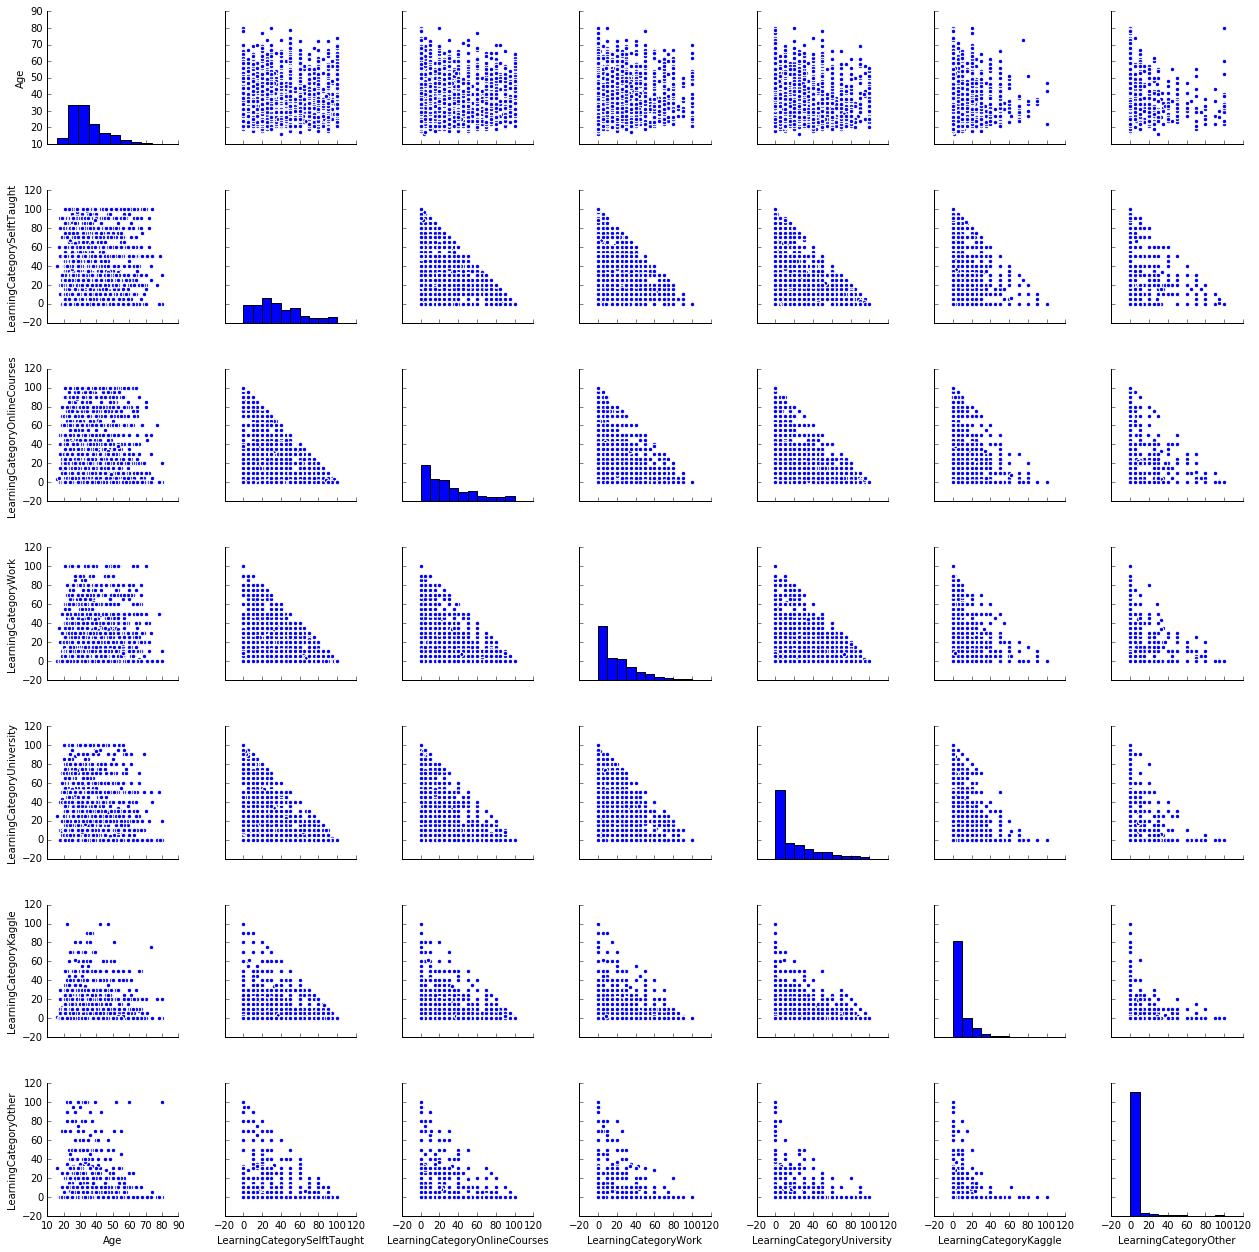

In [376]:
k = sns.pairplot(response)

In [474]:
col = ['GenderSelect','Country','Age','EmploymentStatus','CodeWriter','CurrentJobTitleSelect','MLToolNextYearSelect','MLMethodNextYearSelect','LanguageRecommendationSelect','FormalEducation','MajorSelect','Tenure','FirstTrainingSelect']
response_new = response
for i in col:
    response_new[i] = response_new[i].astype('category')
    response_new[i] = response_new[i].cat.codes
    
response_new.head()

GenderSelect  Country  Age  EmploymentStatus  CodeWriter  \
3             2       50   40                 2           1   
4             2       46   22                 0           1   
5             2        4   30                 0           1   
6             2       50   19                 0           1   
7             1       17    6                 0           0   

   CurrentJobTitleSelect  MLToolNextYearSelect  MLMethodNextYearSelect  \
3                      8                    48                      13   
4                      1                    48                      22   
5                      5                    48                       8   
6                      1                    48                      22   
7                     14                     7                       5   

   LanguageRecommendationSelect  FormalEducation  MajorSelect  Tenure  \
3                             7                3           11       5   
4                             7                1            6       5   
5                             7                1            5       2   
6                             8                3            5       5   
7                            10                0            4       0   

   FirstTrainingSelect  LearningCategorySelftTaught  \
3                    4                         30.0   
4                    4                         60.0   
5                    1                         45.0   
6                    4                         40.0   
7                    4                          0.0   

   LearningCategoryOnlineCourses  LearningCategoryWork  \
3                            0.0                  40.0   
4                            5.0                   5.0   
5                           25.0                  20.0   
6                            0.0                   0.0   
7                           40.0                   0.0   

   LearningCategoryUniversity  LearningCategoryKaggle  LearningCategoryOther  
3                        30.0                     0.0                    0.0  
4                        30.0                     0.0                    0.0  
5                         0.0                    10.0                    0.0  
6                        50.0                    10.0                    0.0  
7                        50.0                    10.0                    0.0

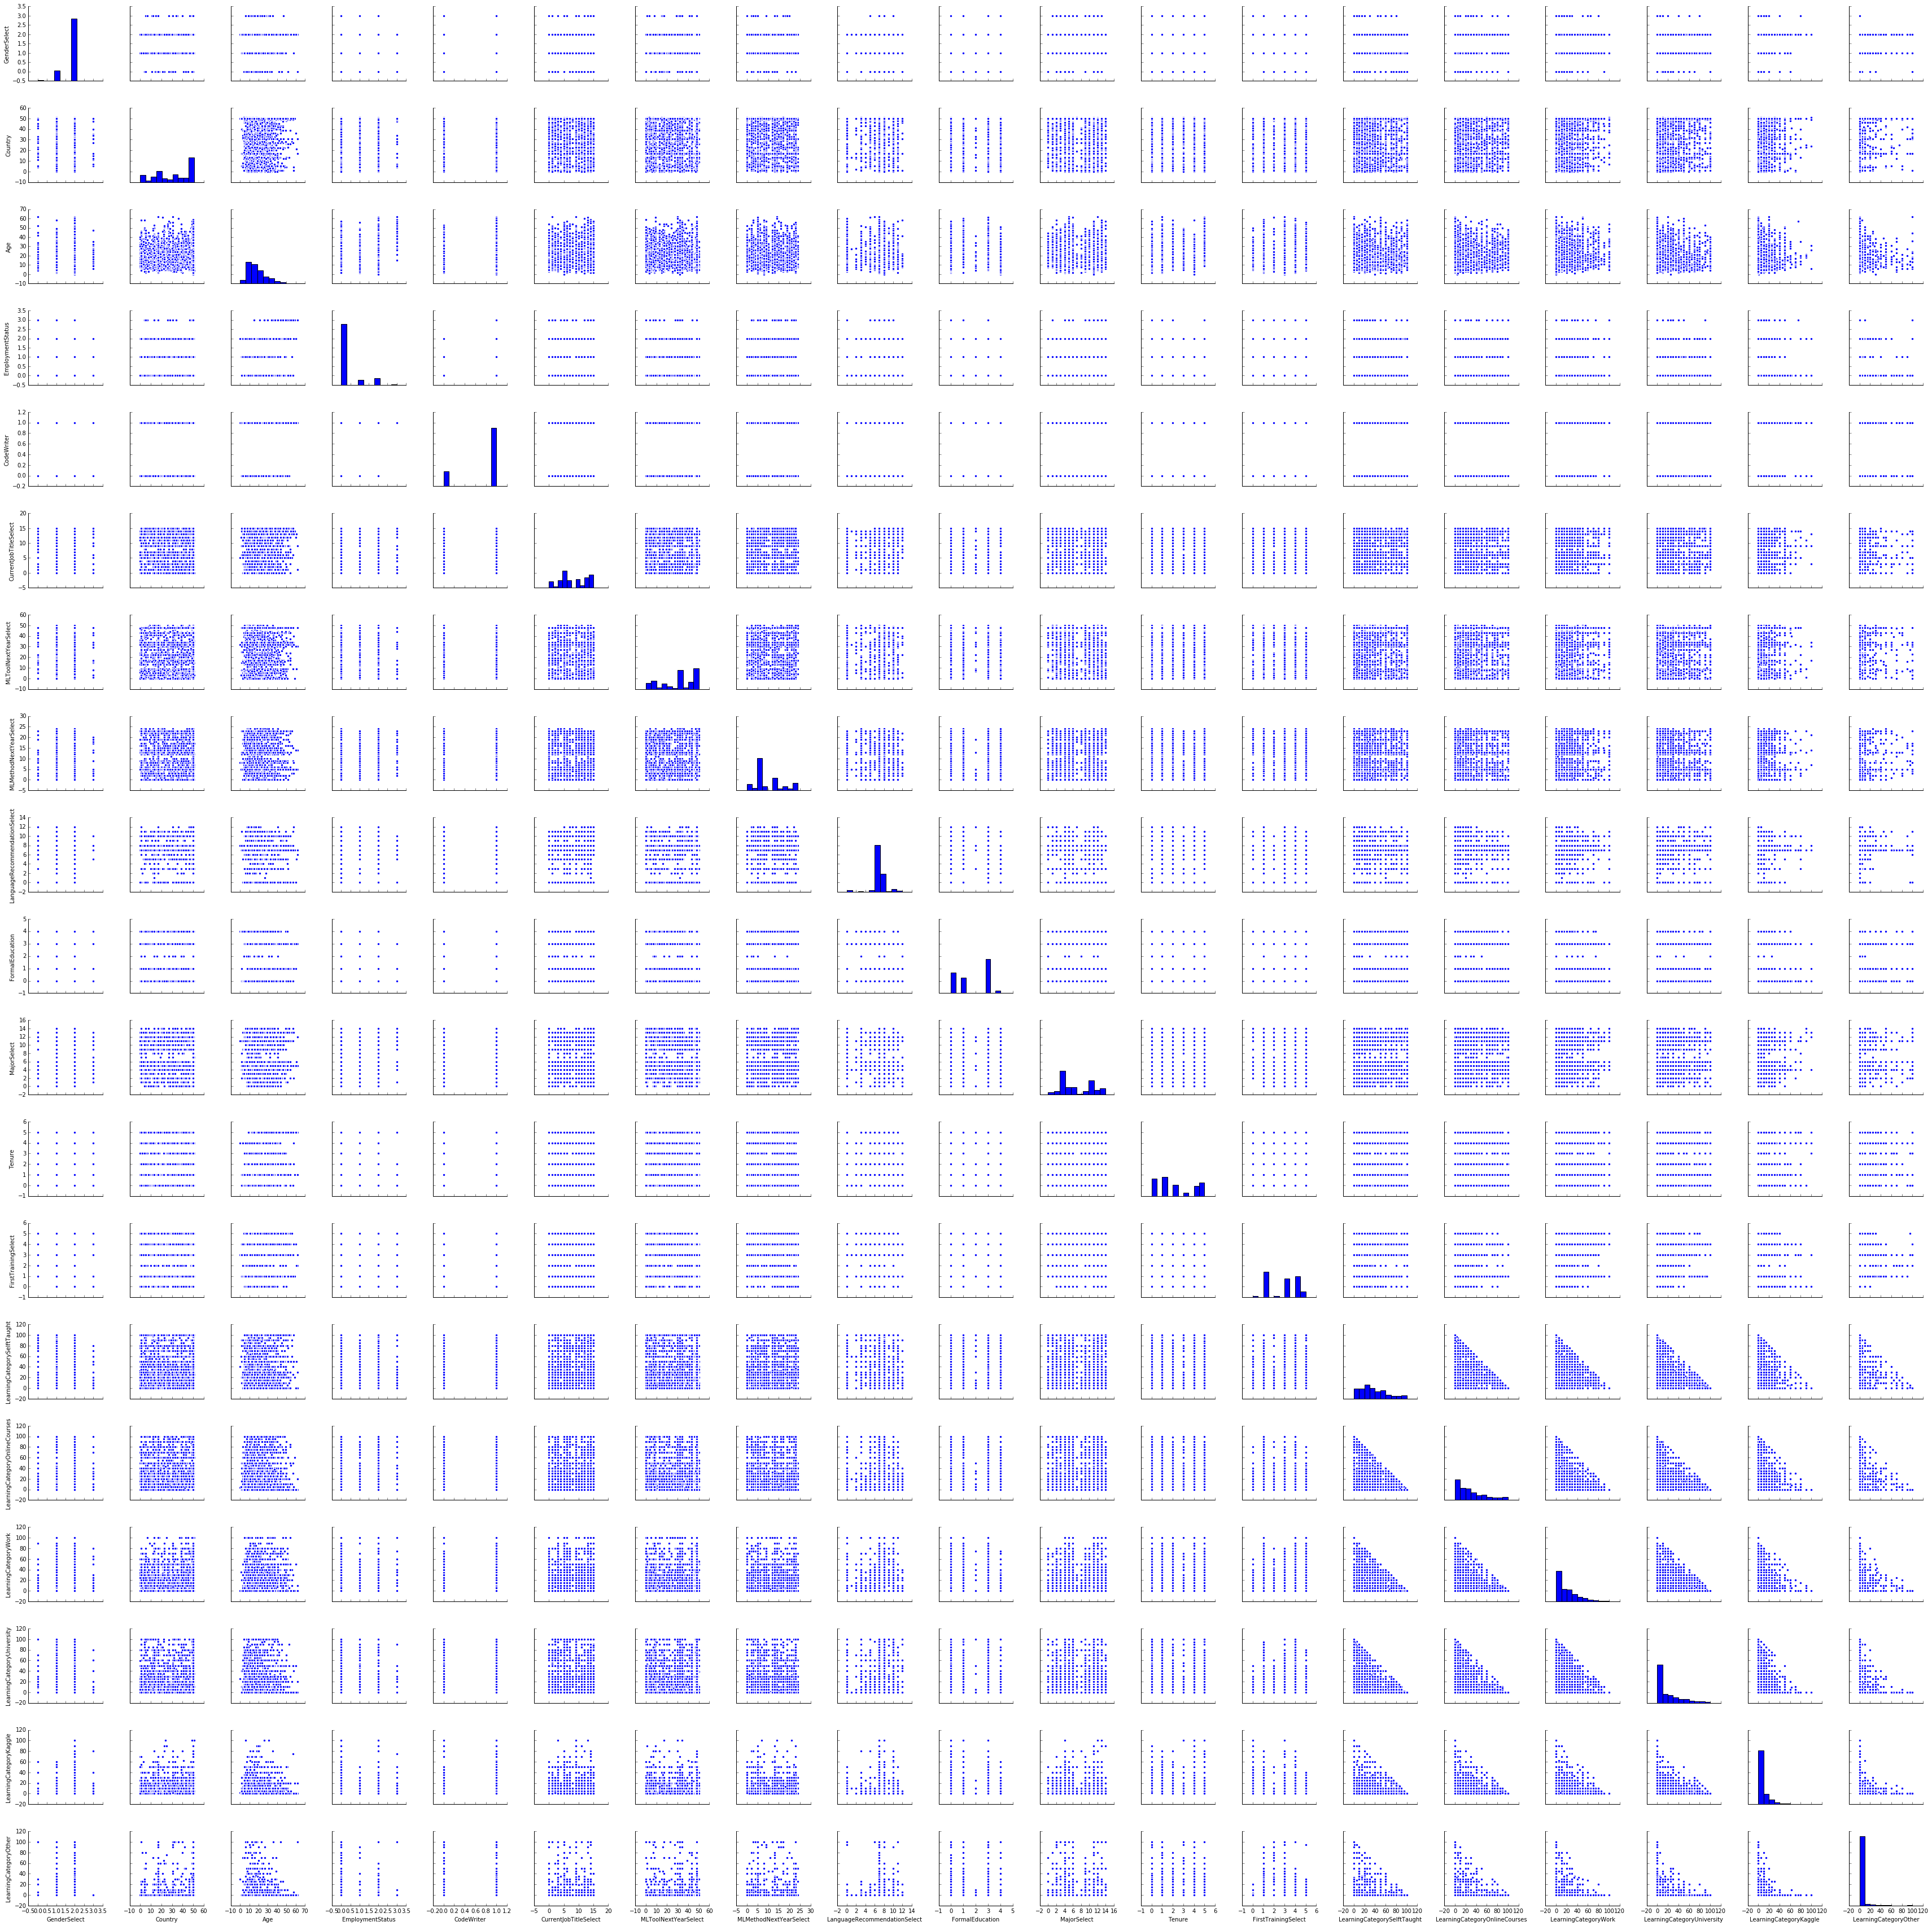

In [475]:
sns.pairplot(response_new)

In [476]:
response_new.head()

GenderSelect  Country  Age  EmploymentStatus  CodeWriter  \
3             2       50   40                 2           1   
4             2       46   22                 0           1   
5             2        4   30                 0           1   
6             2       50   19                 0           1   
7             1       17    6                 0           0   

   CurrentJobTitleSelect  MLToolNextYearSelect  MLMethodNextYearSelect  \
3                      8                    48                      13   
4                      1                    48                      22   
5                      5                    48                       8   
6                      1                    48                      22   
7                     14                     7                       5   

   LanguageRecommendationSelect  FormalEducation  MajorSelect  Tenure  \
3                             7                3           11       5   
4                             7                1            6       5   
5                             7                1            5       2   
6                             8                3            5       5   
7                            10                0            4       0   

   FirstTrainingSelect  LearningCategorySelftTaught  \
3                    4                         30.0   
4                    4                         60.0   
5                    1                         45.0   
6                    4                         40.0   
7                    4                          0.0   

   LearningCategoryOnlineCourses  LearningCategoryWork  \
3                            0.0                  40.0   
4                            5.0                   5.0   
5                           25.0                  20.0   
6                            0.0                   0.0   
7                           40.0                   0.0   

   LearningCategoryUniversity  LearningCategoryKaggle  LearningCategoryOther  
3                        30.0                     0.0                    0.0  
4                        30.0                     0.0                    0.0  
5                         0.0                    10.0                    0.0  
6                        50.0                    10.0                    0.0  
7                        50.0                    10.0                    0.0

In [484]:
array = response_new.values
X = array[:,0:19]
Y = array[:,11]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [485]:
seed = 10
scoring = 'accuracy'

In [487]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.812568 (0.010174)
LDA: 0.404285 (0.016380)
KNN: 0.336537 (0.014270)


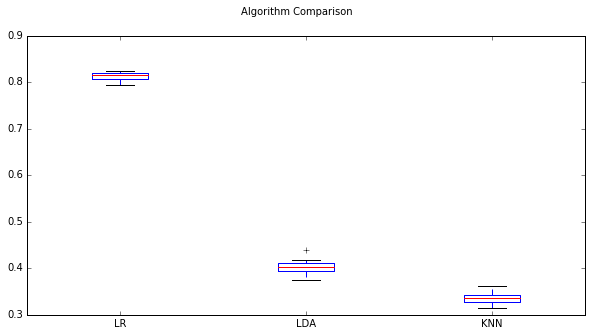

In [494]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [496]:
# Make predictions on validation dataset
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print("accuracy_score")
print(accuracy_score(Y_validation, predictions))
print("confusion_matrix")
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

accuracy_score
0.8104575163398693
confusion_matrix
[[314   0   0   0   0   0]
 [  0 351   0   9   0   0]
 [  0 181  23   5   1   0]
 [  0   0   4  18  39   0]
 [  0   0  12  10 150   0]
 [  0   0   0   0   0 260]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       314
        1.0       0.66      0.97      0.79       360
        2.0       0.59      0.11      0.18       210
        3.0       0.43      0.30      0.35        61
        4.0       0.79      0.87      0.83       172
        5.0       1.00      1.00      1.00       260

avg / total       0.80      0.81      0.77      1377



In [492]:
# Make predictions on validation dataset
lr = LinearDiscriminantAnalysis()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.40885984023238925
[[ 64 147   2  16  47  38]
 [ 40 244   1   8  26  41]
 [ 18 129  11   2   4  46]
 [  2   2   0  14  36   7]
 [ 32  41   0  16  75   8]
 [  6  73  19   3   4 155]]
             precision    recall  f1-score   support

        0.0       0.40      0.20      0.27       314
        1.0       0.38      0.68      0.49       360
        2.0       0.33      0.05      0.09       210
        3.0       0.24      0.23      0.23        61
        4.0       0.39      0.44      0.41       172
        5.0       0.53      0.60      0.56       260

avg / total       0.40      0.41      0.37      1377



# Header